# 
<h1 style="
    background-color:#2f632a;
    color:#fff;
    padding:20px;
    border-radius:8px;
    text-align:center;
    font-family:Consolas, 'Courier New', monospace;
">
Spotify - K-Nearest Neighbors
</h1>

<div style="background-color:#f4faf2; font-family:Consolas; padding:10px; border-radius:8px;">

| **Step to be Executed**                                          |
| ---------------------------------------------- | 
| Data Processing                        | 
| Data Split                            | 
| Model Training                                                 | 
| SMOTE and GridSearch| 
| Evaluation of the Tuned Model |                       

 </div>

## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
1. Data Processing
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
The data set spotify_clean_ABT.xlsx is loaded, previously worked on in the EDA.
</div>

In [1]:
import pandas as pd

# Read the dataset
df_final_ABT = pd.read_excel("spotify_clean_ABT.xlsx")

# Quick preview
print("File loaded successfully with shape:", df_final_ABT.shape)
df_final_ABT.sample(5)

File loaded successfully with shape: (2085, 23)


,artist_popularity,danceability,energy,key,loudness,mode,liveness,valence,tempo,artist_name_encoded,...,dance_energy_ratio,valence_energy,duration_min,instrumentalness_log,acousticness_log,speechiness_log,artist_song_count,artist_avg_popularity,decade,is_modern
1609,54,0.556,0.657,0,78,1,0.113,0.790,80.529,762,...,0.846270,0.519030,3.394217,0.000000,0.157004,0.026155,1,72.000000,2010,1
201,79,0.684,0.834,2,65,0,0.271,0.538,164.020,820,...,0.820143,0.448692,3.627783,0.000000,0.062599,0.065319,3,75.666667,2010,0
344,83,0.722,0.738,9,78,0,0.198,0.748,198.075,495,...,0.978318,0.552024,3.078667,0.000015,0.283674,0.220741,2,76.000000,2010,1
222,69,0.840,0.835,1,64,0,0.152,0.637,103.376,196,...,1.005987,0.531895,3.465117,0.000001,0.002806,0.242946,6,65.666667,2000,0
1467,61,0.884,0.697,11,77,1,0.094,0.322,101.965,825,...,1.268291,0.224434,4.207333,0.000000,0.049647,0.120446,2,62.000000,2000,0


## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
2. Data Split
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
In this step, the dataset is divided into two parts:

Predictors (X): All columns except popularity_class, which will be used as input features for the model.

Target variable (y): popularity_class

The distribution of y is printed to check for class imbalance (whether all popularity categories are equally represented).
</div>

In [2]:
# Define predictors (X) and target (y)
X = df_final_ABT.drop(columns=['popularity_class'])
y = df_final_ABT['popularity_class']

print("Features shape:", X.shape)
print("Target distribution:")
print(y.value_counts(normalize=True) * 100)

Features shape: (2085, 22)
Target distribution:
popularity_class
High      76.115108
Medium    22.206235
Low        1.678657
Name: proportion, dtype: float64


<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
The dataset is split into 80% training and 20% testing sets.
stratify=y keeps class proportions consistent, and random_state=42 ensures reproducibility.
</div>

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
3. Model Training
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
This section evaluates the performance of the KNN classifier.

. The model is initialized with 5 neighbors (n_neighbors=5) and uses the Euclidean distance metric

. The trained model predicts on the training set to check how well it memorized the data and on the test set to evaluate its generalization to unseen data.

. Performance Metrics are conducted to evaluate the model
</div>

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize model
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # Euclidean distance

# Train
knn.fit(X_train_scaled, y_train)

# Predict
y_pred_train = knn.predict(X_train_scaled)
y_pred = knn.predict(X_test_scaled)

# Evaluate
print("Accuracy for train data:", accuracy_score(y_train, y_pred_train))
print("Accuracy for test data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy for train data: 0.8699040767386091
Accuracy for test data: 0.8225419664268585

Classification Report:
               precision    recall  f1-score   support

        High       0.85      0.93      0.89       317
         Low       0.75      0.43      0.55         7
      Medium       0.68      0.47      0.56        93

    accuracy                           0.82       417
   macro avg       0.76      0.61      0.66       417
weighted avg       0.81      0.82      0.81       417


Confusion Matrix:
 [[296   1  20]
 [  3   3   1]
 [ 49   0  44]]


## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
4. SMOTE and GridSearch
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
This step applies SMOTE to address class imbalance in the training data and GridSearchCV to tests multiple combinations of KNN parameters using 5-fold cross-validation.
</div>

In [5]:
import time 
start = time.time()

from imblearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42, k_neighbors=4)),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)


print("Best Parameters:", grid.best_params_)

end = time.time()
print(f"Training time: {end - start:.2f} seconds")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'knn__n_neighbors': 11, 'knn__p': 1, 'knn__weights': 'uniform'}
Training time: 5.09 seconds


## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
5. Evaluation of the Tuned Model
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
This section evaluates the tuned model using the best parameters found in Grid Search.

. Accuracy and balanced accuracy are calculated to assess performance and check for overfitting.

. Classification report summarizes precision, recall, and F1-scores for each class.

. Confusion matrix heatmap visualizes how well the tuned model distinguishes between classes.

. Feature importance Analysis to identify which features influence the model the most.
</div>

Test Accuracy: 0.698

Classification Report:
               precision    recall  f1-score   support

        High       0.89      0.71      0.79       317
         Low       0.13      0.43      0.20         7
      Medium       0.45      0.68      0.54        93

    accuracy                           0.70       417
   macro avg       0.49      0.61      0.51       417
weighted avg       0.78      0.70      0.72       417

Balanced Accuracy for train data: 0.851
Accuracy for train data: 0.755
Balanced Accuracy for test data: 0.605
Accuracy for test data: 0.698


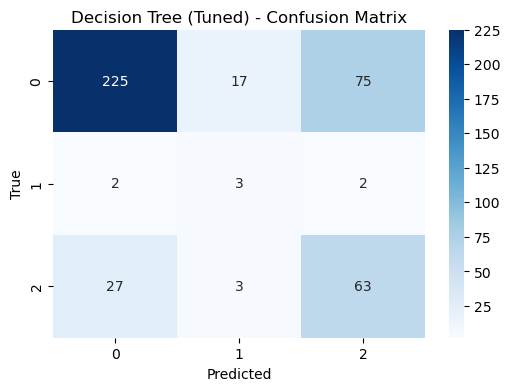

In [6]:
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score, precision_score, balanced_accuracy_score, classification_report
)

best_dt = grid.best_estimator_
# 1️Make predictions with your tuned Decision Tree model
y_pred_best = best_dt.predict(X_test)
y_train_best = best_dt.predict(X_train)
# 2️Evaluate tuned Decision Tree model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print("Test Accuracy:", round(accuracy_score(y_test, y_pred_best), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

print("Balanced Accuracy for train data:", round(balanced_accuracy_score(y_train, y_train_best), 3))
print("Accuracy for train data:", round(accuracy_score(y_train, y_train_best), 3))

print("Balanced Accuracy for test data:", round(balanced_accuracy_score(y_test, y_pred_best), 3))
print("Accuracy for test data:", round(accuracy_score(y_test, y_pred_best), 3))


# 3️Confusion Matrix visualization
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree (Tuned) - Confusion Matrix')
plt.show()

Top 10 Important Features for KNN:
                 Feature  Importance
0  artist_avg_popularity    0.034772
1    artist_name_encoded    0.032254
2     main_genre_encoded    0.029137
3      artist_popularity    0.012470
4      artist_song_count    0.006954
5                  tempo    0.003837
6                 decade    0.003717
7              is_modern    0.001679
8                   mode    0.001439
9         valence_energy    0.000959


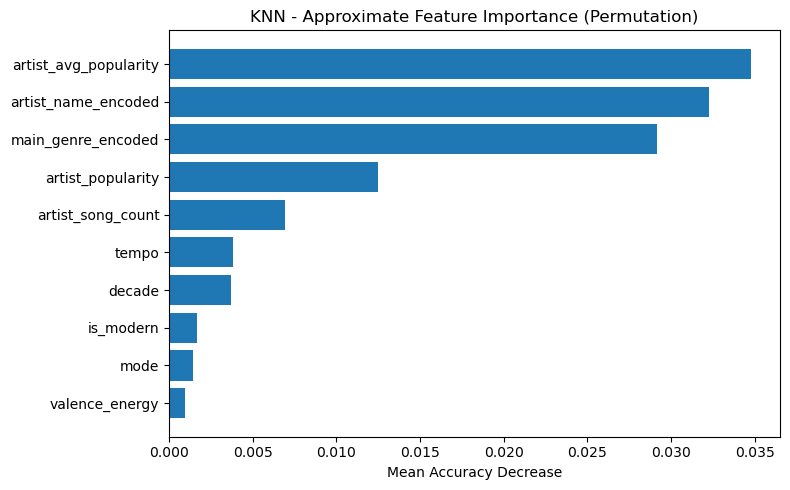

In [7]:
from sklearn.inspection import permutation_importance
r = permutation_importance(best_dt, X_test, y_test, n_repeats=20, random_state=42, scoring='accuracy')

# --- Display top features ---
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': r.importances_mean
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

print("Top 10 Important Features for KNN:")
print(importance_df.head(10))

# --- Plot ---
plt.figure(figsize=(8,5))
plt.barh(importance_df['Feature'].head(10)[::-1], importance_df['Importance'].head(10)[::-1])
plt.title('KNN - Approximate Feature Importance (Permutation)')
plt.xlabel('Mean Accuracy Decrease')
plt.tight_layout()
plt.show()

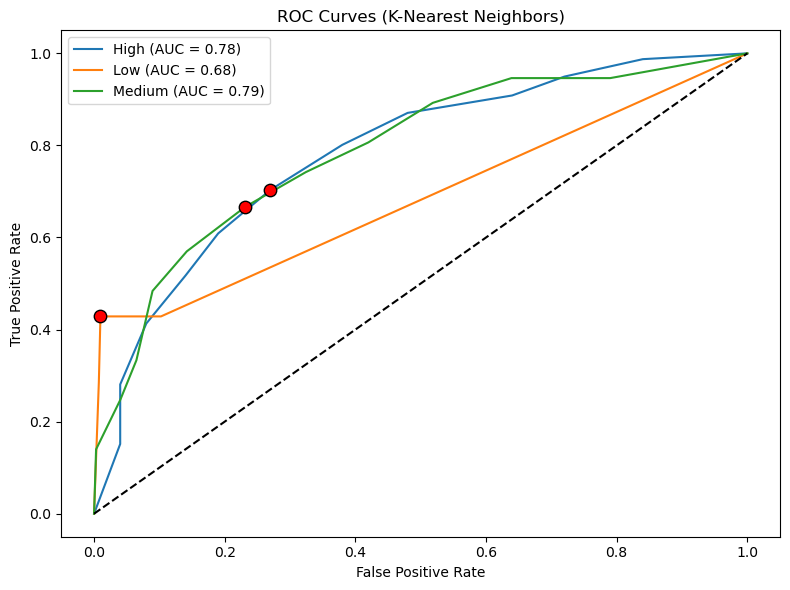

Class order: ['High' 'Low' 'Medium']
Optimal thresholds: {'High': 0.5454545454545454, 'Low': 0.9090909090909091, 'Medium': 0.5454545454545454}


In [8]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

clf = best_dt
classes_enc = clf.classes_
y_pred_proba = clf.predict_proba(X_test)

y_test_bin = label_binarize(y_test, classes=classes_enc)

fpr, tpr, roc_auc, optimal_thresholds = {}, {}, {}, {}

plt.figure(figsize=(8,6))
for i, cls in enumerate(classes_enc):
    fpr[cls], tpr[cls], thr = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[cls] = auc(fpr[cls], tpr[cls])

    j = tpr[cls] - fpr[cls]
    idx = np.argmax(j)
    optimal_thresholds[cls] = thr[idx]

    plt.plot(fpr[cls], tpr[cls], label=f"{cls} (AUC = {roc_auc[cls]:.2f})")
    plt.scatter(fpr[cls][idx], tpr[cls][idx], color='red', s=80, edgecolor='black', zorder=5)

plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curves (K-Nearest Neighbors)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

print("Class order:", classes_enc)
print("Optimal thresholds:", optimal_thresholds)

## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
6. Wrap-up Model Evaluation Summary
</h2>

In [9]:
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    f1_score,
    classification_report
)

acc        = accuracy_score(y_test, y_pred_best)
bal_acc    = balanced_accuracy_score(y_test, y_pred_best)
macro_f1   = f1_score(y_test, y_pred_best, average='macro')
weighted_f1= f1_score(y_test, y_pred_best, average='weighted')

print(f"Accuracy: {acc:.3f}")
print(f"Balanced Accuracy: {bal_acc:.3f}")
print(f"Macro F1-score: {macro_f1:.3f}")
print(f"Weighted F1-score: {weighted_f1:.3f}\n")

print("Classification report:")
print(classification_report(y_test, y_pred_best))

Accuracy: 0.698
Balanced Accuracy: 0.605
Macro F1-score: 0.510
Weighted F1-score: 0.723

Classification report:
              precision    recall  f1-score   support

        High       0.89      0.71      0.79       317
         Low       0.13      0.43      0.20         7
      Medium       0.45      0.68      0.54        93

    accuracy                           0.70       417
   macro avg       0.49      0.61      0.51       417
weighted avg       0.78      0.70      0.72       417

